In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For this example, we'll use the digits dataset from sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images
y = digits.target

Shape of X: (1797, 8, 8)
Shape of y: (1797,)
Target label: 8


<Figure size 640x480 with 0 Axes>

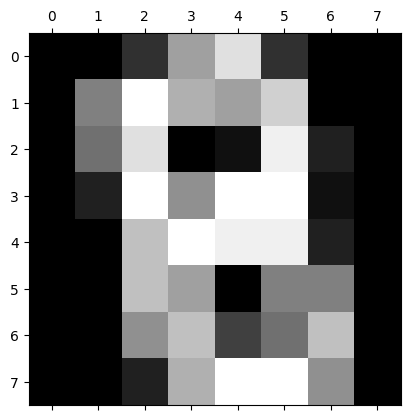

In [4]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

#Displaying and image from the dataset
plt.gray()
print(f"Target label: {digits.target[500]}")
plt.matshow(digits.images[500])
plt.show()

In [5]:
# Feature extraction from images
import cv2

def extract_features(image):
  features = []

  # Original pixel values
  features.extend(image.flatten())

  # Canny edges
  edges = cv2.Canny(image.astype(np.uint8), 100, 200)
  features.extend(edges.flatten())

  # Moments
  moments = cv2.moments(image)
  hu_moments = cv2.HuMoments(moments).flatten()
  features.extend(moments.values())

  return features

In [6]:
# Apply feature extraction to all images
X_features = np.array([extract_features(img) for img in X])

print(f"Shape of X_features: {X_features.shape}")

Shape of X_features: (1797, 152)


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
pcs = PCA(n_components=2)
X_train_pca = pcs.fit_transform(X_train)
X_test_pca = pcs.transform(X_test)

In [10]:
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
# Initialize and train classifiers
logistic_regression = LogisticRegression(max_iter=10000)  # Increased max_iter
evaluate_classifier(logistic_regression, X_train_pca, X_test_pca, y_train, y_test)

random_forest = RandomForestClassifier()
evaluate_classifier(random_forest, X_train_pca, X_test_pca, y_train, y_test)

svm = SVC()
evaluate_classifier(svm, X_train_pca, X_test_pca, y_train, y_test)

Accuracy: 0.4777777777777778
Confusion Matrix:
[[15 11  0  0  1  0  3  2  1  0]
 [ 7  3  3  0  3  4  2  3  2  1]
 [ 1  1 24  6  0  0  1  0  0  0]
 [ 1  0  4 21  0  3  1  1  3  0]
 [ 1  6  0  0 39  0  0  0  0  0]
 [ 0  7  3  5  0 11  0 11  8  2]
 [ 6  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  1  1  6  0 24  0  2]
 [ 6  6  0  4  0  2  0  4  6  2]
 [ 3  8  3  4  2  5  0  5 10  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.45      0.41        33
           1       0.07      0.11      0.09        28
           2       0.65      0.73      0.69        33
           3       0.51      0.62      0.56        34
           4       0.85      0.85      0.85        46
           5       0.35      0.23      0.28        47
           6       0.81      0.83      0.82        35
           7       0.48      0.71      0.57        34
           8       0.20      0.20      0.20        30
           9       0.00      0.00      0.00        40

   